Get dataset from https://github.com/OlafenwaMoses/FireNET
combine train and validate source sets, as these are split in code

## EfficientDet
https://airctic.com/model_efficientdet/

In [ ]:
!wget https://github.com/OlafenwaMoses/FireNET/releases/download/v1.0/fire-dataset.zip -q

In [ ]:
!unzip fire-dataset.zip

Archive:  fire-dataset.zip
replace fire-dataset/train/annotations/img (100).xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace fire-dataset/train/annotations/img (101).xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: fire-dataset/train/annotations/img (101).xml  
  inflating: fire-dataset/train/annotations/img (102).xml  
  inflating: fire-dataset/train/annotations/img (103).xml  
  inflating: fire-dataset/train/annotations/img (104).xml  
  inflating: fire-dataset/train/annotations/img (105).xml  
  inflating: fire-dataset/train/annotations/img (106).xml  
  inflating: fire-dataset/train/annotations/img (107).xml  
  inflating: fire-dataset/train/annotations/img (108).xml  
  inflating: fire-dataset/train/annotations/img (109).xml  
  inflating: fire-dataset/train/annotations/img (110).xml  
  inflating: fire-dataset/train/annotations/img (111).xml  
  inflating: fire-dataset/train/annotations/img (112).xml  
  inflating: fire-dataset/train/annotations/img (113).xml  
  inf

In [ ]:
!rm  fire-dataset.zip

Merge the train and validation datasets as we split later

In [ ]:
cp fire-dataset/validation/annotations/* fire-dataset/train/annotations/

In [ ]:
cp fire-dataset/validation/images/* fire-dataset/train/images/

In [ ]:
!rm  -r fire-dataset/validation/

In [ ]:
!ls fire-dataset/train

annotations  images


In [ ]:
# !pip install icevision[all] icedata -q

!wget https://raw.githubusercontent.com/airctic/icevision/master/install_colab.sh
!bash install_colab.sh

--2021-09-09 10:12:18--  https://raw.githubusercontent.com/airctic/icevision/master/install_colab.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1244 (1.2K) [text/plain]
Saving to: ‘install_colab.sh.1’

install_colab.sh.1  100%[===================>]   1.21K  --.-KB/s    in 0s      

2021-09-09 10:12:18 (47.3 MB/s) - ‘install_colab.sh.1’ saved [1244/1244]

Installing icevision + dependencices for CUDA 10
Uninstalling some dependencies to prevent errors
Found existing installation: torchvision 0.9.0+cu101
Uninstalling torchvision-0.9.0+cu101:
  Successfully uninstalled torchvision-0.9.0+cu101
Found existing installation: fastai 2.3.1
Uninstalling fastai-2.3.1:
  Successfully uninstalled fastai-2.3.1
Installing some dependencies to prevent errors
- Installi

In [ ]:
from icevision.all import *

import matplotlib.pyplot as plt
import icevision
icevision.__version__

INFO     - The mmdet config folder already exists. No need to downloaded it. Path : /root/.icevision/mmdetection_configs/mmdetection_configs-2.10.0/configs | icevision.models.mmdet.download_configs:download_mmdet_configs:18


'0.8.1'

In [ ]:
data_dir = Path('fire-dataset/train')
data_dir

Path('fire-dataset/train')

In [ ]:
images_dir = data_dir / 'images'
annotations_dir = data_dir / 'annotations'

In [ ]:
image_files = [i for i in images_dir.glob('*')]

In [ ]:
annotation_files = [i for i in annotations_dir.glob('*')]

In [ ]:
class_map = ClassMap(['fire'])
print(class_map)

<ClassMap: {'background': 0, 'fire': 1}>


In [ ]:
parser = parsers.voc(annotations_dir=annotations_dir, images_dir=images_dir, class_map=class_map)

WARNING  - This function will be deprecated, instantiate the concrete classes instead: `VOCBBoxParser`, `VOCMaskParser` | icevision.parsers.voc_parser:voc:18


In [ ]:
data_splitter = RandomSplitter((.8, .2))
train_records, valid_records = parser.parse(data_splitter)

  0%|          | 0/502 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:136


  0%|          | 0/401 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

In [ ]:
# show_records(train_records[:3], ncols=3, class_map=class_map)

In [ ]:
presize = 512
size = 384

train_tfms = tfms.A.Adapter([*tfms.A.aug_tfms(size=size, presize=presize), tfms.A.Normalize()])
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(size=size), tfms.A.Normalize()])

The Dataset class combines the records and transforms.

In [ ]:
train_ds = Dataset(train_records, train_tfms)
valid_ds = Dataset(valid_records, valid_tfms)

Displaying the same image with different transforms

In [ ]:
# samples = [train_ds[3] for _ in range(6)]
# show_samples(samples, ncols=3, class_map=class_map)

## EffecientDet
https://airctic.com/model_efficientdet/

EffecientDet is one of the effecient and fastest object detection model that also uses more constrained resources in comparison to other models 

The model accepts a variety of backbones. We can choose one of the efficientdet_d0 to efficientdet_d7 backbones, and MobileNetv3 classes (which also includes MNasNet, MobileNetV2, MixNet and more)

In [ ]:
  extra_args = {}
  
  model_type = models.ross.efficientdet
  backbone = model_type.backbones.tf_lite0
  # The efficientdet model requires an img_size parameter
  extra_args['img_size'] = size

In [ ]:
# Instantiate the mdoel
model = model_type.model(backbone=backbone(pretrained=True), num_classes=len(parser.class_map), **extra_args) 

Each model has its own dataloader (a pytorch `DataLoader`) that could be customized

In [ ]:
# DataLoaders
train_dl = efficientdet.train_dl(train_ds, batch_size=16, num_workers=4, shuffle=True)
valid_dl = efficientdet.valid_dl(valid_ds, batch_size=16, num_workers=4, shuffle=False)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Metrics are essential for tracking the model progress as it's training.
Here we are going to be using the well established COCOMetric, which reports on the mean average precision of the predictions.

In [ ]:
metrics = [COCOMetric(metric_type=COCOMetricType.bbox)]

In [ ]:
# Fastai Learner
learn = model_type.fastai.learner(dls=[train_dl, valid_dl], model=model, metrics=metrics)

SuggestedLRs(lr_min=0.005754399299621582, lr_steep=0.010964781977236271)

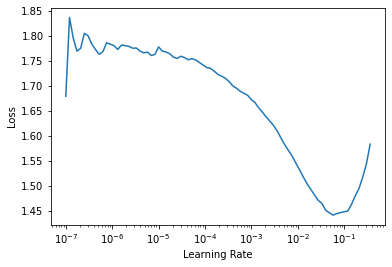

In [ ]:
# Fastai Training
# learn.freeze()
learn.lr_find()

In [ ]:
learn.fine_tune(100, 5e-3, freeze_epochs=10)

epoch,train_loss,valid_loss,COCOMetric,time
0,1.616608,1.558807,0.000042,00:23
1,1.567860,1.514695,0.000147,00:21
2,1.460217,1.364212,0.007660,00:21
3,1.319313,1.223027,0.039366,00:21
4,1.205010,1.133894,0.021161,00:21
5,1.132469,1.135844,0.023535,00:21
6,1.097709,1.113270,0.028926,00:21
7,1.072660,1.076657,0.040552,00:21
8,1.019009,1.091009,0.025623,00:21
9,0.995211,1.045968,0.046729,00:21


epoch,train_loss,valid_loss,COCOMetric,time
0,0.864452,1.028919,0.049299,00:25
1,0.868015,1.011945,0.053126,00:25
2,0.862529,0.933942,0.071049,00:24
3,0.821934,0.908482,0.092231,00:24
4,0.810734,0.818953,0.165846,00:25
5,0.785702,0.769384,0.188625,00:25
6,0.766305,0.793404,0.162630,00:25
7,0.746464,0.790743,0.168544,00:25
8,0.732843,0.738649,0.212173,00:24
9,0.708324,0.770461,0.185958,00:25


After 100 epochs have 0.323955

In [ ]:
efficientdet.show_results(model, valid_ds, class_map=class_map)

TypeError: ignored

In [ ]:

## Saving a Model on Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = Path('/content/gdrive/My Drive/')

torch.save(model.state_dict(), root_dir/'models/icedata/fire-efficientdet-d2.pth')

Mounted at /content/gdrive


`"fire-efficientdet-d2.pth" (32 MB)`